<a href="https://colab.research.google.com/github/andrey-gl/study2020/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проверка статистичеких гипотез (теория)

Наиболее популярные задачи проверки статистических гипотез:
1. Гипотеза согласия. Пусть $\mathbf{X} = (X_1, . . . , X_n)$ - выборка объёма $n$ из распределения $\mathcal{F}_\mathbf{X}$ и $\mathcal{F}$ - некоторая функция распределения. Гипотеза: функции распределения совпадают: $\mathcal{F}_\mathbf{X} = \mathcal{F}$. Привет - гипотеза о нормальности распределения, гипотеза об экспоненциальном распределении.
2. Гипотеза однородности. Пусть $\mathbf{X} = (X_1, . . . , X_n)$ и $\mathbf{Y} = (Y_1, . . . , Y_m)$ - выборки объема $n$ и $m$ соответственно. Гипотеза: функции распределения совпадают: $\mathcal{F}_\mathbf{X} = \mathcal{F}_\mathbf{Y}$.
3. Гипотеза независимости. Гипотеза: Выборки $\mathbf{X}$ и $\mathbf{Y}$ независимы.
4. Гипотеза о параметре распределения. Пусть $\mathbf{X} = (X_1, . . . , X_n)$ - выборка объёма $n$ из распределения $\mathcal{F}_\theta(\mathbf{X})$. Гипотеза: $\theta(\mathbf{X}) = \theta$.

**Определение:** Гипотезой ($H$) называется любое предположение о распределении наблюдений. 

Как правило, рассматриваются две гипотезы:
1. $H_0$ - основная или нулевая гипотеза
2. $H_1$ - алтернативная гипотеза

Пусть дана выборка $\mathbf{X} = (X_1, . . . , X_n)$. Статитикой критерия называется функция от выборки $T(\mathbf{X})$, которая позволяет определить, насколько наши данные согласуются с нашии гипотезами (неточное определение).

**Определение:** Ошибкой первого рода - отвергаем основную гипотезу, когда она верна. Ошибка второго рода - отвергаем альтернативную гипотезу, когда она верна.

1. $P_{H_0}(T(\mathbf{X}) > T_\alpha) \leq \alpha$.
2. $P_{H_1}(T(\mathbf{X}) < T_\alpha) \rightarrow 0$.

Здесь $P_{H_0}(T(\mathbf{X}) > T_\alpha)$ - ошибка первого рода, $P_{H_1}(T(\mathbf{X}) < T_\alpha)$ - ошибка второго рода, $\alpha$ - уровень значимости.

**Проверка на нормальность**

Тест Шапиро-Уилка - проверка на нормальность.
Когда распределение не является нормальным:
1. Выборосы
2. Ассиметрия
3. Отклонение от формы

Альтернативные способ проверки центра распределения - медианы. Критерий Манна-Уитни.

**Гипотезы о равенстве математических ожиданий двух выборок.**
1. Если выборки парные, используется парный t-критерий Стьюдента
2. Если выборни независимые, используется t-критерий для двух независимых выборок.

Вопрос о равенствен дисперсий. F-тест Фишера или критерий Флигнера-Килена.

Если отклонение от нормальности существенно:
1. Игнорировать при больших объемах данных.
2. Использовать медиану вместо матожидания.
3. Преобразование данных.

# Проверка статистичеких гипотез (Практика)

##Пример. Проверка на нормальность


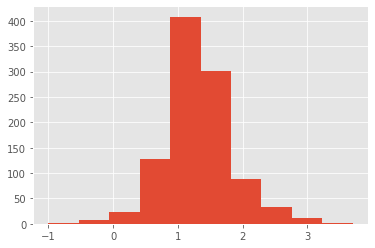

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')

df = pd.read_csv('sample_data/town_1959_2.csv', encoding='cp1251')
df = df.set_index(u'номер')

plt.hist(np.log10(df[u'население']))

plt.show()

In [9]:
res = stats.shapiro(np.log10(df[u'население']))
print('p-value: ', res[1])

p-value:  3.1486824866172602e-12


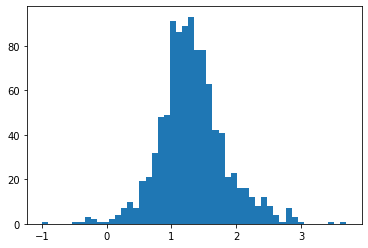

In [6]:
# отклоняем гипотезу о нормальности. Почему?
plt.hist(np.log10(df[u'население']), bins=50);

In [10]:
df = pd.read_csv('sample_data/Albuquerque Home Prices_data.txt', sep='\t')
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


## Пример. Критерий Манна-Уитни.


In [11]:
df = df.replace(-9999, np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [12]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

In [13]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

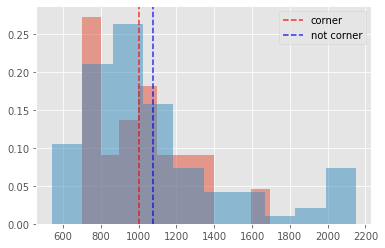

In [14]:
two_histograms(x, y)

In [15]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.40220407862126695


##Пример. T-критерий стьюдента 

In [21]:
df = pd.read_csv('sample_data/interference.csv')
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [22]:
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

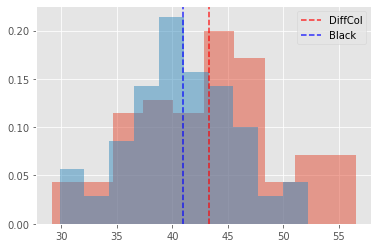

In [23]:
two_histograms(x, y)

In [27]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value:  0.0162416779538072


In [28]:
res = stats.fligner(x, y)
print('p-value: ', res[1])
#Гипотезу о равенстве дисперсий отвергаем

p-value:  0.0457148434681976


In [30]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])
#а если все таки не отвергаем?

p-value:  0.015244667999298047


In [32]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  0.015175237251894121


## Пример зависимости цены от площади


In [34]:
df = pd.read_csv('sample_data/Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


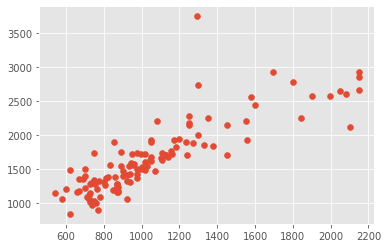

In [35]:
plt.scatter(df['PRICE'], df['SQFT'])

In [37]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
print('p-value: ', res[1])

p-value:  5.146345707629025e-33
